# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import os
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

(5120, 6)
(5120, 3)


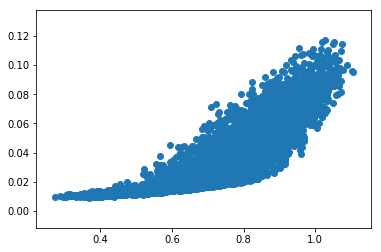

In [2]:
mc_points_preprocessed = np.loadtxt('../mc6.txt')
forces = np.loadtxt('../force_6_params_mc.dat')
mc_points = []
for f in forces[:,0]:
    for n in range(mc_points_preprocessed.shape[0]):
        if mc_points_preprocessed[n,0] == f:
            mc_points.append(mc_points_preprocessed[n,1:])
mc_points = np.array(mc_points)




input_size=6
train_size=128
validation_size=128

epochs = 5

airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]

print(mc_points.shape)
print(forces.shape)
plt.scatter(forces[:,1], forces[:,2])

# Network size


In [ ]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    try_best_network_sizes(parameters=mc_points, 
                           samples=forces[:,n+1], 
                           base_title='Airfoils MC %s' % force_name,
                          epochs=epochs)

Config 4 x 6 ([0 x 0] / [5 x 5])
Training and postprocessing took: 6.6610023975372314 seconds (0.11101670662562052 minutes) (0.001850278443760342 hours)
Config 4 x 12 ([0 x 1] / [5 x 5])
Training and postprocessing took: 8.593478679656982 seconds (0.1432246446609497 minutes) (0.002387077411015828 hours)
Config 4 x 24 ([0 x 2] / [5 x 5])
Training and postprocessing took: 11.447373390197754 seconds (0.1907895565032959 minutes) (0.0031798259417215985 hours)
Config 4 x 48 ([0 x 3] / [5 x 5])
Training and postprocessing took: 15.975512504577637 seconds (0.2662585417429606 minutes) (0.004437642362382676 hours)
Config 4 x 96 ([0 x 4] / [5 x 5])
Training and postprocessing took: 19.648709535598755 seconds (0.32747849225997927 minutes) (0.005457974870999654 hours)
Config 8 x 6 ([1 x 0] / [5 x 5])
Training and postprocessing took: 28.949645519256592 seconds (0.48249409198760984 minutes) (0.008041568199793497 hours)
Config 8 x 12 ([1 x 1] / [5 x 5])
Training and postprocessing took: 35.4439268112

# One network per variable

In [ ]:
force_names=['Lift', 'Drag']

for n, force_name in enumerate(force_names):
    display(HTML("<h1>%s</h1>"% force_name))
    train_single_network(parameters=mc_points, 
                         samples=forces[:,n+1], 
                         base_title='Airfoils MC %s' % force_name,
                         network = airfoils_network,
                         epochs=epochs, 
                         large_integration_points = None)